In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import seaborn as sns
import os
import re
import time
import pickle
import pdb
import pandas as pd

sns.set()

Using TensorFlow backend.


# Loading in data

In [2]:
input_data_quasar_high = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/quasar_star_preprocessed_data_high")


# input_data_quasar_low = \
# pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/var_star_preprocessed_data_low")


input_data_var = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/var_star_preprocessed_data_low")

In [3]:
input_data_var.keys()

dict_keys(['IMAGES', 'LABELS', 'NOISE', 'FLUX', 'WAVE', 'REDSHIFT'])

In [4]:
# high_redshift = input_data_quasar_high['REDSHIFT']

# low_redshift = input_data_quasar_low['REDSHIFT']

# var_redshift = input_data_var['REDSHIFT']

In [5]:
var_redshift = []
for i in range(len(input_data_var['LABELS'])):
    
    if input_data_var['LABELS'][i] == 0.0 :
        
        var_redshift.append(input_data_var['REDSHIFT'][i])
        
    else:
        pass
        

high_redshift = []
high_s_redshift = []
        
for i in range(len(input_data_quasar_high['LABELS'])):
    
    if input_data_quasar_high['LABELS'][i] == 0.0 :
        
        high_redshift.append(input_data_quasar_high['REDSHIFT'][i])
        
    else:
        high_s_redshift.append(input_data_quasar_high['REDSHIFT'][i])

In [6]:
print(max(high_redshift))
print(len(var_redshift))
print(type(high_s_redshift))

[3.0496426]
2455
<class 'list'>


In [7]:
s = np.random.uniform(2.45,3.05, 658) 

In [8]:
var_redshift = np.asarray(var_redshift[:,0])
high_redshift = np.asarray(high_redshift[:,0])

TypeError: list indices must be integers or slices, not tuple

Text(0.5, 1.0, 'Variable QSO')

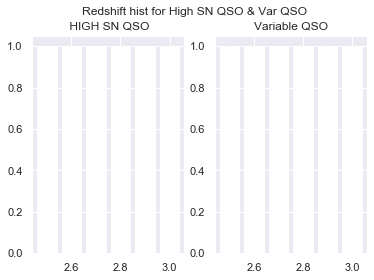

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Redshift hist for High SN QSO & Var QSO')

ax1.hist(high_redshift, bins = 6)
ax1.set_xlim(2.44,3.06)
#ax1.set_ylim(0,185)
ax1.set_title(' HIGH SN QSO')

ax2.hist(var_redshift , bins = 6)
ax2.set_xlim(2.44,3.06)
#ax2.set_ylim(0,185)
ax2.set_title('Variable QSO')

In [10]:
sorted_var = sorted(var_redshift)

In [11]:
lists = [[] for _ in range(6)]



In [12]:
def binning_data(sorted_redshifts, bin_num):
    
    bins = [[] for _ in range(bin_num)]
    
    for i in range(len(sorted_redshifts)):
        
        if (sorted_redshifts[i] >= start) & (sorted_redshifts[i] < 2.55):
        
            bins[0].append(sorted_redshifts[i])
    
        elif (sorted_redshifts[i] >= 2.55) & (sorted_redshifts[i] < 2.65):
        
            bins[1].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.65) & (sorted_redshifts[i] < 2.75):
        
            bins[2].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.75) & (sorted_redshifts[i] < 2.85):
        
            bins[3].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.85) & (sorted_redshifts[i] < 2.95):

            bins[4].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.95) & (sorted_redshifts[i] < end ):
        
            bins[5].append(sorted_redshifts[i])
            
    return bins

In [13]:
def binning_data(sorted_redshifts, bin_num):
    
    bins = [[] for _ in range(bin_num)]
    
    for i in range(len(sorted_redshifts)):
        
        if (sorted_redshifts[i] >= 2.45) & (sorted_redshifts[i] < 2.50):
        
            bins[0].append(sorted_redshifts[i])
            
        elif (sorted_redshifts[i] >= 2.50) & (sorted_redshifts[i] < 2.55):
        
            bins[1].append(sorted_redshifts[i])
    
        elif (sorted_redshifts[i] >= 2.55) & (sorted_redshifts[i] < 2.60):
        
            bins[2].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.60) & (sorted_redshifts[i] < 2.65):
        
            bins[3].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.65) & (sorted_redshifts[i] < 2.70):
        
            bins[4].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.70) & (sorted_redshifts[i] < 2.75):

            bins[5].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.75) & (sorted_redshifts[i] < 2.80):
        
            bins[6].append(sorted_redshifts[i])
            
    
        elif (sorted_redshifts[i] >= 2.80) & (sorted_redshifts[i] < 2.85):
        
            bins[7].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.85) & (sorted_redshifts[i] < 2.90):
        
            bins[8].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.90) & (sorted_redshifts[i] < 2.95):
        
            bins[9].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 2.95) & (sorted_redshifts[i] < 3.0):

            bins[10].append(sorted_redshifts[i])
        
        elif (sorted_redshifts[i] >= 3.0) & (sorted_redshifts[i] < 3.05):
        
            bins[11].append(sorted_redshifts[i])
            
    return bins

In [14]:
var_binned = binning_data(var_redshift, 6)

high_binned = binning_data(high_redshift, 6)

IndexError: list index out of range

In [ ]:
print(len(var_binned[0]))
print(len(var_binned[1]))
print(len(var_binned[2]))
print(len(var_binned[3]))
print(len(var_binned[4]))
print(len(var_binned[5]))

print('------')

print(len(high_binned[0]))
print(len(high_binned[1]))
print(len(high_binned[2]))
print(len(high_binned[3]))
print(len(high_binned[4]))
print(len(high_binned[5]))

In [ ]:
var_dist = np.asarray(var_binned[0] + var_binned[1][:384] + var_binned[2][:319] + var_binned[3][:248] +\
           var_binned[4][:202] + var_binned[5][:176])



In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Redshift hist for High SN QSO & Var QSO')

ax1.hist(np.asarray(high_redshift), bins = 6)
ax1.set_xlim(2.44,3.06)
#ax1.set_ylim(0,185)
ax1.set_title(' HIGH SN QSO')

ax2.hist(var_dist , bins = 6)
ax2.set_xlim(2.44,3.06)
#ax2.set_ylim(0,185)
ax2.set_title('Variable QSO')

In [ ]:
bin0 = []
bin1 = []
bin2 = []
bin3 = []
bin4 = []
bin5 = []


for i in range(len(sorted_var)):
    
    if (sorted_var[i] >= 2.45) & (sorted_var[i] < 2.55):
        
        bin0.append(sorted_var[i])
    
    elif (sorted_var[i] >= 2.55) & (sorted_var[i] < 2.65):
        
        bin1.append(sorted_var[i])
        
    elif (sorted_var[i] >= 2.65) & (sorted_var[i] < 2.75):
        
        bin2.append(sorted_var[i])
        
    elif (sorted_var[i] >= 2.75) & (sorted_var[i] < 2.85):
        
        bin3.append(sorted_var[i])
        
    elif (sorted_var[i] >= 2.85) & (sorted_var[i] < 2.95):
        
        bin4.append(sorted_var[i])
        
    elif (sorted_var[i] >= 2.95) & (sorted_var[i] < 3.05):
        
        bin5.append(sorted_var[i])
        
        

In [ ]:
print(len(bin0))
print(len(bin1))
print(len(bin2))
print(len(bin3))
print(len(bin4))
print(len(bin5))

In [ ]:
s = np.random.choice(sorted_var, 658)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Redshift hist for High SN QSO & Var QSO')

ax1.hist(np.asarray(high_redshift), bins = 6)
ax1.set_xlim(2.44,3.06)
#ax1.set_ylim(0,185)
ax1.set_title(' HIGH SN QSO')

ax2.hist(np.asarray(var_redshift), bins = 6)
ax2.set_xlim(2.44,3.06)
#ax2.set_ylim(0,185)
ax2.set_title('Variable QSO')

In [ ]:
print(len(input_data_quasar_low['LABELS']))
print(len(input_data_var['LABELS']))

## Var Split

In [ ]:
train_images = input_data_var['IMAGES'][:3072, :, :, :]
print(np.shape(train_images))
train_labels = input_data_var['LABELS'][:3072]
print(np.shape(train_labels))

val_images = input_data_var['IMAGES'][3072:3730, :, :, :]
print(np.shape(val_images))
val_labels = input_data_var['LABELS'][3072:3730]
print(np.shape(val_labels))

test_images = input_data_var['IMAGES'][3730:4388, :, :, :]
print(np.shape(test_images))
test_labels = input_data_var['LABELS'][3730:4388]
print(np.shape(test_labels))

## High Split

In [ ]:
train_images = input_data_quasar_high['IMAGES'][:3072, :, :, :]
print(np.shape(train_images))
train_labels = input_data_quasar_high['LABELS'][:3072]
print(np.shape(train_labels))

val_images = input_data_quasar_high['IMAGES'][3072:3730, :, :, :]
print(np.shape(val_images))
val_labels = input_data_quasar_high['LABELS'][3072:3730]
print(np.shape(val_labels))

test_images = input_data_quasar_low['IMAGES'][3730:4388, :, :, :]
print(np.shape(test_images))
test_labels = input_data_quasar_low['LABELS'][3730:4388]
print(np.shape(test_labels))

In [ ]:
s = np.random.uniform(2.45,3.05, 658)

In [ ]:
a,b,c = plt.hist(s, bins=10)

In [ ]:
plt.hist(input_data_var['REDSHIFT'][3730:4388], bins = 50)
plt.xlim(2.45,3.05)
plt.ylim(0,60)
plt.title('Test variable')


## Hist of test sets for variable & high

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')

ax1.hist(input_data_var['REDSHIFT'][3730:4388], bins = 50)
ax1.set_xlim(2.45,3.05)
ax1.set_ylim(0,60)
ax1.set_title('Test variable')

ax2.hist(input_data_var['REDSHIFT'][3730:4388], bins = 50)
ax2.set_xlim(2.45,3.05)
ax2.set_ylim(0,60)
ax2.set_title('Test high')

In [ ]:
len(input_data_var['LABELS'][3730:4388])

## Hist of training sets for variable & high

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hist of TRAINING SETS')

ax1.hist(input_data_var['REDSHIFT'][:3072], bins = 50)
ax1.set_xlim(2.45,3.05)
ax1.set_ylim(0,200)
ax1.set_title('Train VARIABLE')

ax2.hist(input_data_quasar_high['REDSHIFT'][:3072], bins = 50)
ax2.set_xlim(2.45,3.05)
ax2.set_ylim(0,300)
ax2.set_title('Train HIGH')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hist of TEST sets')

ax1.hist(input_data_var['REDSHIFT'][3730:4388], bins = 50)
ax1.set_xlim(2.45,3.05)
ax1.set_ylim(0,60)
ax1.set_title('Test VARIABLE')

ax2.hist(input_data_var['REDSHIFT'][3730:4388], bins = 50)
ax2.set_xlim(2.45,3.05)
ax2.set_ylim(0,60)
ax2.set_title('Test HIGH')

In [ ]:
def binning_data(data_dict, bin_num):
    
    bins = [{} for _ in range(bin_num)]
    
    for i in range(len(data_dict['REDSHIFT'])):
        
        if (data_dict['REDSHIFT'][i] >= 2.45) & (data_dict['REDSHIFT'][i] < 2.50):
        
            bins[0] = {'REDSHIFT': data_dict['REDSHIFT'][i], 'CLASS': data_dict['CLASS'][i],\
                    'WAVE': data_dict['WAVE'][i], 'FLUX': data_dict['FLUX'][i], 'NOISE': data_dict['NOISE'][i]} 
            
        elif (data_dict['REDSHIFT'][i] >= 2.50) & (data_dict['REDSHIFT'][i] < 2.55):
        
            bins[1].append(data_dict['REDSHIFT'][i])
    
        elif (data_dict['REDSHIFT'][i] >= 2.55) & (data_dict['REDSHIFT'][i] < 2.60):
        
            bins[2].append(data_dict['REDSHIFT'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.60) & (data_dict['REDSHIFT'][i] < 2.65):
        
            bins[3].append(data_dict['REDSHIFT'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.65) & (data_dict['REDSHIFT'][i] < 2.70):
        
            bins[4].append(data_dict['REDSHIFT'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.70) & (data_dict['REDSHIFT'][i] < 2.75):

            bins[5].append(data_dict['REDSHIFT'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.75) & (data_dict['REDSHIFT'][i] < 2.80):
        
            bins[6].append(data_dict['REDSHIFT'][i])
            
    
        elif (data_dict['REDSHIFT'][i] >= 2.80) & (data_dict['REDSHIFT'][i] < 2.85):
        
            bins[7].append(data_dict['REDSHIFT'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.85) & (data_dict['REDSHIFT'][i] < 2.90):
        
            bins[8].append(data_dict['REDSHIFT'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.90) & (data_dict['REDSHIFT'][i] < 2.95):
        
            bins[9].append(data_dict['REDSHIFT'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.95) & (data_dict['REDSHIFT'][i] < 3.0):

            bins[10].append(data_dict['REDSHIFT'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 3.0) & (data_dict['REDSHIFT'][i] < 3.05):
        
            bins[11].append(data_dict['REDSHIFT'][i])
            
    return bins